##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Negative Neurons - Feature Visualization

This notebook uses  [**Lucid**](https://github.com/tensorflow/lucid) to reproduce some of the results in [Feature Visualization](https://distill.pub/2017/feature-visualization/).

This notebook doesn't introduce the abstractions behind lucid; you may wish to also read the [Lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb).

**Note**: The easiest way to use this tutorial is as a colab notebook, which allows you to dive in with no setup. We recommend you enable a free GPU by going:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

## Install, Import, Load Model

In [ ]:
!pip install --quiet "lucid>=0.3.11"
#!pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

In [3]:
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [4]:
# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

# Diversity


<img src="https://storage.googleapis.com/lucid-static/feature-visualization/5.png" width="660"></img>

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x13f7c6bb0>
512 638.7031



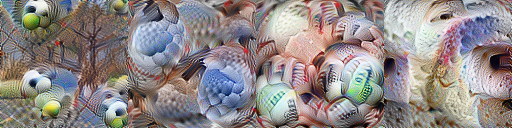

In [5]:
param_f = lambda: param.image(128, batch=4)
obj = objectives.channel("mixed5a_pre_relu", 9) - 1e2*objectives.diversity("mixed5a")
_ = render.render_vis(model, obj, param_f)